# Regresión I: ¿Donde estan los ojos?

Muchos de los sistemas de reconocimiento de personas por medio de imagenes utilizan la ubicación de puntos importantes en la cara, con el objetivo de identificar la ubicación del rostro. Algunos puntos importantes son los ojos, la nariz y la boca, a partir de ellos es posible definir las coordenadas entre las cuales se encuentra ubicada la cara de la persona. El profesor Alexander siempre ha tenido una gran fascinadción por estos sistemas, y dado que sus estudiantes ya saben como trabajar con redes neuronales, él ha decidido que ellos realicen un sistemas de identificación de la ubicación de los ojos a partir de imagenes.

Para la realización de este proyecto el estudiante debera:

1. Crear una base de datos con fotografias donde diferentes personas, y en cada una de estas se debe generar un elemento que identifique la ubicación de los ojos. Aqui debe tener en cuenta dos cosas:
    * Tenga en cuenta que una red aprende con base en la información que le proporcionemos, asi que al crear la base de datos tenga en cuenta todas las posibilidades que se imaginen de como podrian estar esas fotos.
    * Si tenemos imagenes muy grandes esto requerira de una red muy grande que puede tardar mucho tiempo en entrenar. Tenga en cuenta esto por si es necesario procesar las imagenes antes de ingresarlas a la red.   
2. Definir las arquitecturas de red que debe probar.
3. Escoger la red que mejor se desempeñe.
4. Evaluar el rendimiento de la red.


Tenga en cuenta que todo el procedimiento debe ser lo mas amigable para probar. Es decir si el profesor Alexander quiere probar una foto, entonces él solo deberia ingresar la foto en una función la cual se encargue de hacer todo el procesamiento y proporcionar como salida si la persona tiene o no tapabocas.

Además el profesor quiere que contesten las siguientes preguntas:

1. ¿Qué puede concluir del comportamiento de la red y los datos proporcionados?
2. ¿Qué criterio utilizo para seleccionar la arquitectura de la red?
3. ¿Tiene la red el comportamiento esperado?, sino, ¿A qué cree que se debe esto?
4. ¿Qué le mejoraria al modelo que usted diseño?, ¿Cómo implementaría esas mejoras?

## Qué se debe entregar:

Par ala entrega del proyecto deben porporcionar:

1. La base de datos generada.
2. Un notebook de Jupyter donde presentan todo el pipeline para el entrenamiento de la red. Cada parte debe ser explicada.
3. El notebook debe incluir una función que permita ingresar una muestra de entrada y se proporcione la salida, sin mas pasos intermedios. Por lo tanto en esta función se debe tener en cuenta el acondicionamiento de los datos, antes de ser introducidos en la red neuronal par arealizar las predicciones.
4. El notebook debe incluir las respuestas a las preguntas planteadas.

In [18]:
import numpy as np           # Esta libreria se utiliza para realizar operaciones matemáticas y para manejar arreglos
from xml.dom import minidom  # Esta libreria se utiliza para leer archivos xml
from imutils import paths    # Esta libreria se utiliza para ni mondada porque no funciona con xml
import glob                  # Esta libreria se importa para guardar todo el conjunto de archivos xml
import cv2                   # Esta libreria 
import matplotlib.pyplot as plt      
from PIL import Image        
import matplotlib.patches as patches
from keras import models
from keras import layers

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Vamos a normalizar tanto los datos de entrada que son las imagenes como los datos de salida (y) que son las posiciones de los ojos y luego se va a modificar el tamaño de las imagenes con resample image.

In [19]:
# Guarda todos los archivos xml en una lista
xml_list = []
for filename in glob.glob('train_labels/*.xml'): 
    im = minidom.parse(filename)
    xml_list.append(im)

# Se crea una lista con los valores de las y esperada
y = []
for xml in xml_list:
    y_1 = []
    xmin = xml.getElementsByTagName("xmin")[0]
    y_1.append(int(xmin.firstChild.data)/600)    # Se normalizan los datos dividiendolos por el máximo (600)
    ymin = xml.getElementsByTagName("ymin")[0]
    y_1.append(int(ymin.firstChild.data)/600)
    xmax = xml.getElementsByTagName("xmax")[0]
    y_1.append(int(xmax.firstChild.data)/600)
    ymax = xml.getElementsByTagName("ymax")[0]
    y_1.append(int(ymax.firstChild.data)/600)
    y.append(y_1)
    
# Se transforma la lista en array
y = np.array(y)


Ahora se leeran las imagenes de entrenamiento y se transformaran a escala de grises.


In [20]:
#Obtener el path de cada imágen en el dataset
train_imag_paths = list(paths.list_images('train_imag/'))
test_imag_paths = list(paths.list_images('test_imag/'))
def train_func(path_list):
    train_list=[]
    for m in path_list:
        image=Image.open(m)   # abrimoslaimagen a travez del path 
        gray_image=image.convert('L')    # loconvertimosa escala de grises 
        gray_image_array=np.asarray(gray_image)   # imagen a tipo array
        gray_image_array = gray_image_array.astype('float32')/255  # normalizamos   
        gray_image_array = cv2.resize(gray_image_array, (0,0), fx=0.1, fy=0.1)    # cambiamos el tamaño de la imagen 
        train_list.append(gray_image_array)
    train_list=np.array(train_list)
    return train_list

train_imag=train_func(train_imag_paths)
train_imag=train_imag.reshape((train_imag.shape[0],60*60))

test_imag=train_func(test_imag_paths)
test_imag=test_imag.reshape((test_imag.shape[0],60*60))

Cramos la red neuronal para regresión 


In [21]:
model = models.Sequential()
model.add(layers.Dense(3600,activation = 'relu',         #Funcion de activacion relu
                       input_shape=(train_imag.shape[1],))) # numeor de variables de entrada 
model.add(layers.Dense(1000,activation = 'relu'))
model.add(layers.Dense(500,activation = 'relu'))
model.add(layers.Dense(100,activation = 'relu'))
model.add(layers.Dense(50,activation = 'relu'))
model.add(layers.Dense(4)) # salida cuatro neuronaa 
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [22]:
history = model.fit(train_imag, y, epochs=140, batch_size = 128, verbose=1, validation_split=0.3)

Epoch 1/140
1/1 [==============================] - 1s 731ms/step - loss: 0.3184 - mae: 0.4826 - val_loss: 113.1183 - val_mae: 7.5944
Epoch 2/140
1/1 [==============================] - 0s 171ms/step - loss: 105.1674 - mae: 7.2925 - val_loss: 0.7400 - val_mae: 0.6776
Epoch 3/140
1/1 [==============================] - 0s 182ms/step - loss: 0.7193 - mae: 0.6603 - val_loss: 0.7766 - val_mae: 0.7636
Epoch 4/140
1/1 [==============================] - 0s 181ms/step - loss: 0.7540 - mae: 0.7448 - val_loss: 0.2361 - val_mae: 0.4028
Epoch 5/140
1/1 [==============================] - 0s 197ms/step - loss: 0.2084 - mae: 0.3707 - val_loss: 0.3068 - val_mae: 0.4597
Epoch 6/140
1/1 [==============================] - 0s 188ms/step - loss: 0.2945 - mae: 0.4443 - val_loss: 2.3460 - val_mae: 1.3340
Epoch 7/140
1/1 [==============================] - 0s 184ms/step - loss: 2.1722 - mae: 1.2856 - val_loss: 1.4081 - val_mae: 1.0494
Epoch 8/140
1/1 [==============================] - 0s 174ms/step - loss: 1.3368

1/1 [==============================] - 0s 167ms/step - loss: 0.0229 - mae: 0.1224 - val_loss: 0.0240 - val_mae: 0.1215
Epoch 64/140
1/1 [==============================] - 0s 181ms/step - loss: 0.0234 - mae: 0.1213 - val_loss: 0.0245 - val_mae: 0.1254
Epoch 65/140
1/1 [==============================] - 0s 173ms/step - loss: 0.0242 - mae: 0.1288 - val_loss: 0.0282 - val_mae: 0.1289
Epoch 66/140
1/1 [==============================] - 0s 186ms/step - loss: 0.0263 - mae: 0.1255 - val_loss: 0.0258 - val_mae: 0.1288
Epoch 67/140
1/1 [==============================] - 0s 166ms/step - loss: 0.0255 - mae: 0.1321 - val_loss: 0.0289 - val_mae: 0.1328
Epoch 68/140
1/1 [==============================] - 0s 187ms/step - loss: 0.0270 - mae: 0.1270 - val_loss: 0.0290 - val_mae: 0.1353
Epoch 69/140
1/1 [==============================] - 0s 181ms/step - loss: 0.0300 - mae: 0.1414 - val_loss: 0.0358 - val_mae: 0.1550
Epoch 70/140
1/1 [==============================] - 0s 187ms/step - loss: 0.0336 - mae: 0

Epoch 125/140
1/1 [==============================] - 0s 170ms/step - loss: 0.0174 - mae: 0.1044 - val_loss: 0.0194 - val_mae: 0.1071
Epoch 126/140
1/1 [==============================] - 0s 171ms/step - loss: 0.0161 - mae: 0.1011 - val_loss: 0.0201 - val_mae: 0.1084
Epoch 127/140
1/1 [==============================] - 0s 180ms/step - loss: 0.0170 - mae: 0.1031 - val_loss: 0.0201 - val_mae: 0.1094
Epoch 128/140
1/1 [==============================] - 0s 170ms/step - loss: 0.0170 - mae: 0.1028 - val_loss: 0.0195 - val_mae: 0.1087
Epoch 129/140
1/1 [==============================] - 0s 186ms/step - loss: 0.0168 - mae: 0.1040 - val_loss: 0.0202 - val_mae: 0.1094
Epoch 130/140
1/1 [==============================] - 0s 171ms/step - loss: 0.0166 - mae: 0.1006 - val_loss: 0.0189 - val_mae: 0.1047
Epoch 131/140
1/1 [==============================] - 0s 188ms/step - loss: 0.0158 - mae: 0.0996 - val_loss: 0.0191 - val_mae: 0.1057
Epoch 132/140
1/1 [==============================] - 0s 175ms/step - 

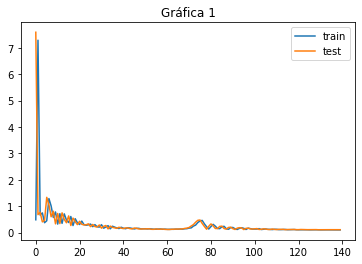

In [23]:
plt.figure
plt.title("Gráfica 1")
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['train','test'])

Predicción de las imagenes de prueba  

In [24]:
prediction = model.predict(test_imag)   

Visualizamos las primeras 10 imagenes con las que se evalua la precición del modelo

Visualizamos el resultado de la predicción de las primera 10 imágenes
Imagen:  0


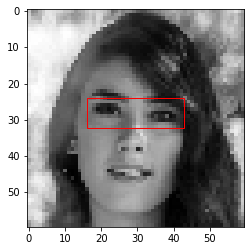

Imagen:  1


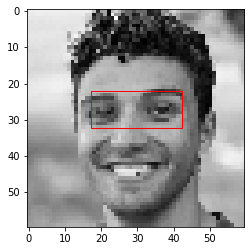

Imagen:  2


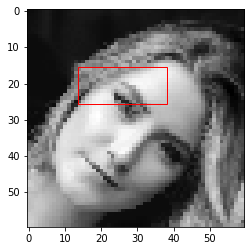

Imagen:  3


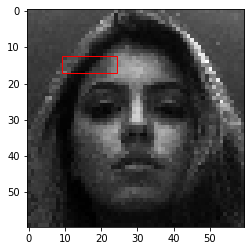

Imagen:  4


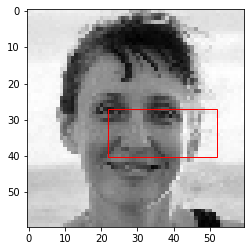

Imagen:  5


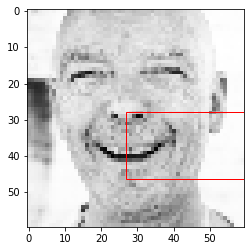

Imagen:  6


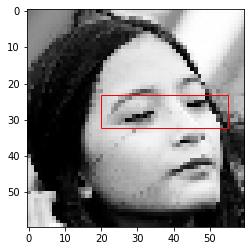

Imagen:  7


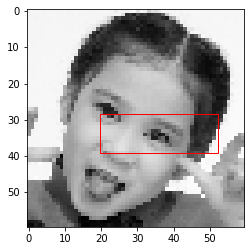

Imagen:  8


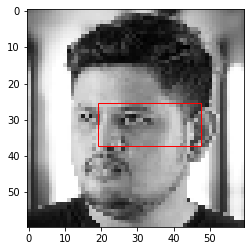

Imagen:  9


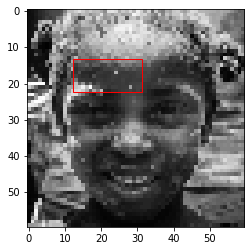

In [25]:
print("Visualizamos el resultado de la predicción de las primera 10 imágenes")
for m in range(10):
    print("Imagen: ", m)
    image=Image.open(test_imag_paths[m])   # abrimoslaimagen a travez del path 
    gray_image=image.convert('L')    # loconvertimosa escala de grises 
    gray_image_array=np.asarray(gray_image)   # imagen a tipo array
    #gray_image_array = gray_image_array.astype('float32')/255  # normalizamos   
    gray_image_array = cv2.resize(gray_image_array, (0,0), fx=0.1, fy=0.1)    # cambiamos el tamaño de la imagen 
    fig,ax = plt.subplots(1)
    ax.imshow(gray_image_array,cmap='gray')                                  # mostramos la nueva imagen con su nuevo tamaño 
    #plt.imshow(newImg,cmap='gray')
    xmin = prediction[m][0]*gray_image_array.shape[1]
    ymin = prediction[m][1]*gray_image_array.shape[1]
    xmax = prediction[m][2]*gray_image_array.shape[1]
    ymax = prediction[m][3]*gray_image_array.shape[1]
    rect = patches.Rectangle((abs(xmin),abs(ymin)),abs(xmax-xmin),abs(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')  # rectangulo de las coordenadas 
    ax.add_patch(rect)
    plt.show()


**A continuación, se presenta la función que introduce la imagen e identifica la posición de los ojos, lo único que debe hacer es añadir dicha imagen a la carpeta "predict_image"**

In [26]:
def predict_image(path_imag):
    print("Hacemos la predicción sobre las imagenes que están en la carpeta: \npredict_image")
    print("Nota: todas las imagenes deben ser del mismo tamaño")
    pre_image=train_func(path_imag)
    pre_image = pre_image.reshape((pre_image.shape[0],pre_image.shape[1]*pre_image.shape[2]))
    prediccion = model.predict(pre_image)
    for m in range(len(path_imag)):
        image=Image.open(path_imag[m])   # abrimoslaimagen a travez del path 
        image=np.asarray(image)   # imagen a tipo array
        fig,ax = plt.subplots(1)
        ax.imshow(image)
        xmin = prediccion[m][0]
        ymin = prediccion[m][1]
        xmax = prediccion[m][2]
        ymax = prediccion[m][3]
        rect = patches.Rectangle(image.shape[0]*(abs(xmin),abs(ymin)*image.shape[0]),abs(xmax-xmin)*image.shape[0],abs(ymax-ymin)*image.shape[0],linewidth=1,edgecolor='r',facecolor='none')  # rectangulo de las coordenadas 
        ax.add_patch(rect)
        plt.show()

Hacemos la predicción sobre las imagenes que están en la carpeta: 
predict_image
Nota: todas las imagenes deben ser del mismo tamaño


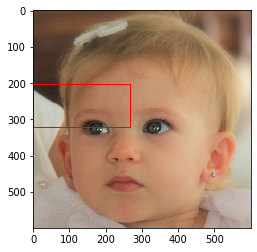

In [28]:
path_predict=list(paths.list_images('predict_image/'))
predict_image(path_predict)

**Solución Preguntas** 

1) ¿Qué puede concluir del comportamiento de la red y los datos proporcionados?

Se puede apreciar durante la ejecución del código, especialmente en la Gráfica 1 que la red neuronal se comporta de la mejor manera a partir de la época 60 aproximadamente, se estabiliza y converge a su mínimo. Con este tipo de red neuronal se deben pre-procesar bastantes los datos ya que si no se hace se volvería una red bastante pesada con demasiadas neuronas y capas ocultas para hacer una predicción de una imagen común por lo que en el algoritmo se convierten las imágenes a escala de grises, luego se disminuye en un 10 por ciento la imagen y se normaliza la matriz resultante, esta última matriz es la que procesa la red. Con las etiquetas (la ubicación de los ojos en la imagen) se normalizaron.

2) ¿Qué criterio utilizo para seleccionar la arquitectura de la red?

El número de capas ocultas fue al tanteo y se escogió el numero que mejor dio resultados mientras que para la capa de entrada se calculo el tamaño del vector resultante de cada imagen y se uso como numero de neuronas de entrada, para la salida solo necesitamos 4 neuronas que dieran la posición de los ojos. La función de activación se usó Relu porque devuelve 0 si la entrada es negativa, pero para cualquier entrada positiva, devuelve ese valor y sirve en este algoritmo ya que las entradas son positivas al ser imágenes sin mencionar que esta función de activación es más rápida que la sigmoidal. En el optimizador se usó Adam ya que a partir de una pequeña investigación se encontró que es el que tienen mejor rendimiento en la mayoría de los casos.

3) ¿Tiene la red el comportamiento esperado?, sino, ¿A qué cree que se debe esto?

No tiene el comportamiento esperado ya que como se puede ver en algunas imágenes de prueba el algoritmo no identifica precisamente la posición de los ojos y mas bien selecciona otra parte de la cara, esto se debe a que la arquitectura de la red es muy sencilla para solucionar este tipo de problemas mientras que al usar una red convolucional la cual tiene una arquitectura más compleja se podría llegar al comportamiento esperado que es la posición exacta de los ojos de cada persona en cada imagen.

4) ¿Qué le mejoraria al modelo que usted diseño?, ¿Cómo implementaría esas mejoras?

En la capa de salida de la red se podría usar la función de activación sigmoidal para tener valores entre 0 y 1, 
también se puede cambiar el tipo de red convolucional para obtener los resultados esperados, por lo demás se considera que el modelo 
esta bien.